[View in Colaboratory](https://colab.research.google.com/github/YaminiMuralidharen/MachineLearningexercises/blob/master/Kmeansclustering.ipynb)

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


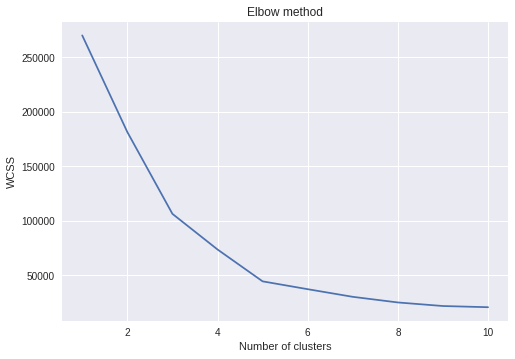

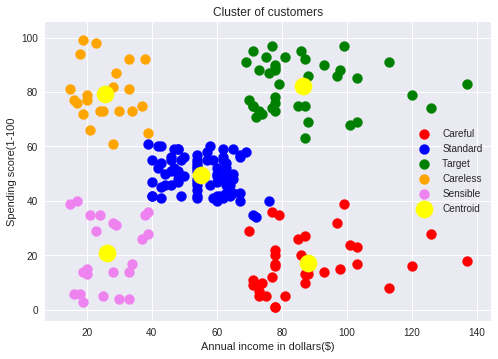

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on  Sep 8 15:53:56 2018

@author: yaminimuralidharen
"""

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import data set with pandas
dtset = pd.read_csv('Mall_Customers.csv')
# : for all rows , specific column index
X = dtset.iloc[:,[3,4]].values
 #using elbow method to find the no of clusters - using skikit learn
 
from sklearn.cluster import KMeans
wcss = []  # find cluster sum of squares to append to wcss
 # 10 iterations for finding k , 11 is exclusive in range
for i in range(1, 11 ):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 ) 
    # n_init -> no of times k means run with diff init
    # random_state fixes all factors on k means process
    #to fit kmeans to our dataset
    kmeans.fit(X) #fit is method to fit  kmeans to data
    wcss.append(kmeans.inertia_)   # intertia to compute cluster sum of squares
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# from the elbow method we find the optimum number of clusters is 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300,n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# visualize cluster

plt.scatter(X[y_kmeans  == 0,0], X[y_kmeans  == 0,1], s = 100 , c ='red' , label ='Careful') # customers have high income and low spending score , they can be classfied as Careful
plt.scatter(X[y_kmeans  == 1,0], X[y_kmeans  == 1,1], s = 100 , c ='blue' , label ='Standard') #  average income and average spending score
plt.scatter(X[y_kmeans  == 2,0], X[y_kmeans  == 2,1], s = 100 , c ='green' , label ='Target') # High income and high spending score , so these should be target
plt.scatter(X[y_kmeans  == 3,0], X[y_kmeans  == 3,1], s = 100 , c ='orange' , label ='Careless') # low income high spending score
plt.scatter(X[y_kmeans  == 4,0], X[y_kmeans  == 4,1], s = 100 , c ='violet' , label ='Sensible') #low income and low spending score
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label ='Centroid')
plt.title('Cluster of customers')
plt.xlabel('Annual income in dollars($)')
plt.ylabel('Spending score(1-100')
plt.legend()
plt.show()

# From the dataset we can understand that the mal shoulld target high income people who spend and send them promotions to much branded prodcuts. 
#It should also target low income customers with high spending score with promotions and offers. These 2 sets should be targeted as they are expected to buy the products that are being offered at discount in the mall